In [202]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, roc_auc_score, recall_score,
    precision_score, f1_score, RocCurveDisplay)
from imblearn.metrics import specificity_score

from nltk.stem import WordNetLemmatizer



from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [203]:
df = pd.read_csv('../data/source.csv')
df.head(2)

,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc,post_date,post_time
0,Bitcoin,Bitcoin swings every cycle and I realized a lo...,I made a bot that sends me a daily text with t...,1.0,1,10b3smq,OverEducation4426,0,2023-01-13 19:55:32,1673639747,1673639748,2023-01-13,19:55:32
1,Bitcoin,Why are people still scared to invest when you...,when inflation has peaked the bottom was in fo...,1.0,1,10b3fr4,Accurate-Fox9427,0,2023-01-13 19:40:57,1673638868,1673638869,2023-01-13,19:40:57


In [204]:
df.subreddit.value_counts()

Bitcoin     1529
ethereum     739
Name: subreddit, dtype: int64

In [205]:
df['subreddit'] = df.subreddit.apply(lambda x: 1 if x == 'Bitcoin' else 0)
df

,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc,post_date,post_time
0,1,Bitcoin swings every cycle and I realized a lo...,I made a bot that sends me a daily text with t...,1.0,1,10b3smq,OverEducation4426,0,2023-01-13 19:55:32,1673639747,1673639748,2023-01-13,19:55:32
1,1,Why are people still scared to invest when you...,when inflation has peaked the bottom was in fo...,1.0,1,10b3fr4,Accurate-Fox9427,0,2023-01-13 19:40:57,1673638868,1673638869,2023-01-13,19:40:57
2,1,I'm just wondering if it makes any sense I'll ...,Question related to security of using same see...,1.0,1,10b2gzn,PrimaryHuckleberry11,0,2023-01-13 19:01:13,1673636490,1673636490,2023-01-13,19:01:13
3,1,My friend has been CRUSHING it at work. Last y...,The future and why they must debase the currency,1.0,1,10b2a8k,Tryingtodoit23,0,2023-01-13 18:53:45,1673636037,1673636038,2023-01-13,18:53:45
4,1,Was cleaning out my Aunts house after she pass...,Need help accessing BTC from flash drive,1.0,1,10b270g,nominal_sloth,0,2023-01-13 18:50:06,1673635825,1673635825,2023-01-13,18:50:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,0,I wanted an opinion on which hard wallet to bu...,Hi guys,1.0,1,ylv1ts,Environmental-Log167,0,2022-11-04 10:26:57,1667557629,1669825062,2022-11-04,10:26:57
2264,0,It's really great news for ETH that Instagram ...,Instagram is launching NFT's on Polygon! This ...,1.0,1,ylka7o,Crypto_Economist42,0,2022-11-04 00:50:20,1667523033,1669825156,2022-11-04,00:50:20
2265,0,[BETPLAY](https://betplay.io/?ref=SALPAR) is ...,Betplay - fastest Crypto casino with ETH,1.0,1,ylhjic,Historical_Walk6927,0,2022-11-03 22:56:09,1667516183,1669825194,2022-11-03,22:56:09
2266,0,"Hey fellow Redditors, I'm not sure if sharing...",Essay: Reducing the barrier for crypto using M...,1.0,1,ylek5s,whataheck,0,2022-11-03 20:52:10,1667508741,1669825224,2022-11-03,20:52:10


In [206]:
df.subreddit.value_counts()

1    1529
0     739
Name: subreddit, dtype: int64

# Lemmatize

In [207]:
lm = WordNetLemmatizer()

In [208]:
posts_t_lm = []

for post in comb_tokens:
    post_st = [] # empty post stems
    for word in post:
        #print(word)
        word_st = lm.lemmatize(word) # get lemmatized word
        post_st.append(word_st) # add to post list
    posts_t_lm.append(post_st)  # add post list to lemma matrix
    
posts_t_lm[0][:10]

NameError: name 'comb_tokens' is not defined

# Model

In [209]:
X1 = df.title
x2 = df.selftext
y = df.subreddit

In [210]:
y.value_counts(normalize=True)

1    0.674162
0    0.325838
Name: subreddit, dtype: float64

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X1,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [268]:
# Pipeline accepts multiple transformers, but only one vectorizer. See cgpt results:

'''The error message is caused by the fact that you are trying to fit two different vectorizers (TfidfVectorizer and CountVectorizer) 
in the same pipeline, but only providing one input (X_train) to the pipeline. This is causing the pipeline to raise an error as it doesn't 
know which vectorizer to apply to the input. 

You can fix this by either removing one of the vectorizers or providing separate inputs to the pipeline for each vectorizer.'''


pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    #('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [276]:
pipe_params = {
    'tvec__max_features': range(600,800,5),
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)]
    #'cvec__max_features': range(2500, 3500, 100),
    #'cvec__min_df': range(1,5),
    #'cvec__max_df': [i/100 for i in range(0, 100, 5)],
    #'cvec__ngram_range': [(1,1),(1, 2), (1,3)]
}

In [ ]:
# Create the model
level1_estimators = [
    ('lasso', LassoCV()),
    ('knn_pipe', Pipeline([
        ('ss', StandardScaler()),
        ('knn', KNeighborsRegressor())
    ])),
    ('bag', BaggingRegressor())
]

stacked_model = StackingRegressor(estimators = level1_estimators,
                                 final_estimator = LinearRegression())

In [277]:
rs = RandomizedSearchCV(pipe, 
                  pipe_params, 
                    cv = 5) 

In [278]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                             ('nb', MultinomialNB())]),
                   param_distributions={'tvec__max_features': range(600, 800, 5),
                                        'tvec__ngram_range': [(1, 1), (1, 2),
                                                              (1, 3)],
                                        'tvec__stop_words': [None, 'english']})

In [279]:
print(rs.score(X_train, y_train))
rs.score(X_test, y_test)

0.8965314520870077


0.8606701940035273

In [280]:
rs.best_params_

{'tvec__stop_words': 'english',
 'tvec__ngram_range': (1, 1),
 'tvec__max_features': 715}

In [281]:
rs.score(X_test, y_test)

0.8606701940035273

In [282]:
preds = rs.predict(X_test)

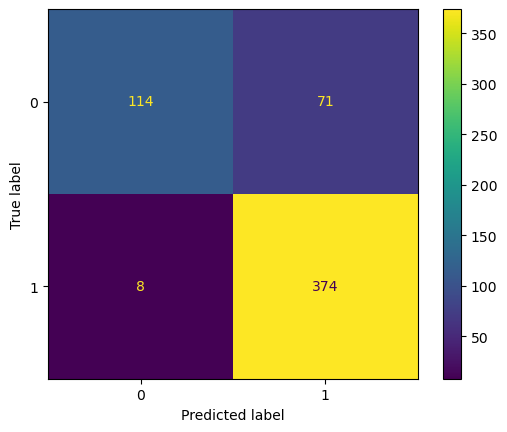

In [283]:
cm = confusion_matrix(y_test, preds)

display = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = rs.classes_)

display.plot();

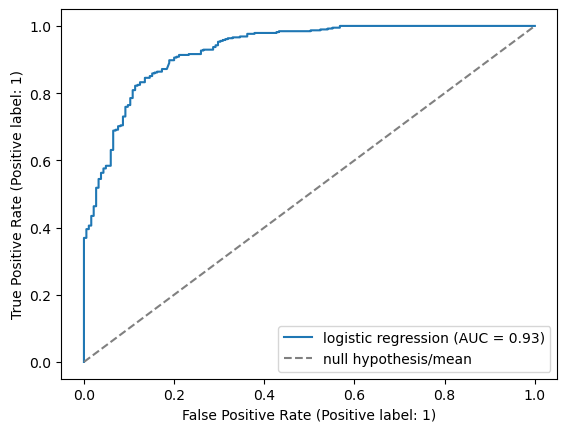

In [284]:
# Basic ROC

# cf ROC
# create an ax object
ax = plt.gca()

# use RocCurveDisplay for both estimators
RocCurveDisplay.from_estimator(rs, X_test, y_test, ax=ax, name='logistic regression')

# add 'worst case scenario' line
plt.plot([0,1], [0,1], label='null hypothesis/mean', linestyle='--', color='gray')

# necessary to label the baseline
plt.legend();